<a href="https://colab.research.google.com/github/sparshdubey95/MLmodels/blob/main/RNN_Model_for_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset and check column names
df = pd.read_csv("stock_data.csv")
print(df.columns)  # Check the column names

# If 'Date' column is present, continue with the code below
# Otherwise, replace 'Date' with the actual name of the date column
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    print("The 'Date' column is not found. Please check the column names and update accordingly.")


Index(['Unnamed: 0', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5'], dtype='object')
The 'Date' column is not found. Please check the column names and update accordingly.


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3631 - loss: 0.8946 - val_accuracy: 0.6479 - val_loss: 0.5600
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6979 - loss: 0.4532 - val_accuracy: 0.6901 - val_loss: 0.3319
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7428 - loss: 0.2633 - val_accuracy: 0.7606 - val_loss: 0.2375
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7676 - loss: 0.1995 - val_accuracy: 0.7887 - val_loss: 0.1865
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7974 - loss: 0.1450 - val_accuracy: 0.7746 - val_loss: 0.1506
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8020 - loss: 0.1186 - val_accuracy: 0.7887 - val_loss: 0.1213
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7918 - loss: 0.0990 - val_accuracy: 0.8028 - val_loss: 0.1066
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7997 - loss: 0.0850 - val_accuracy: 0.8169 - val_loss: 0.0985
Epoch 9/50
9/9 ━━━

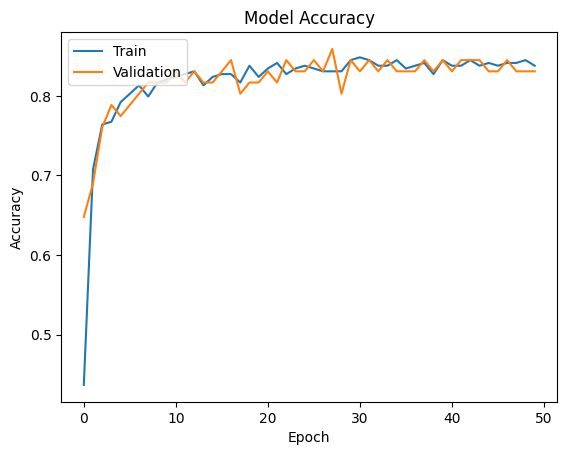

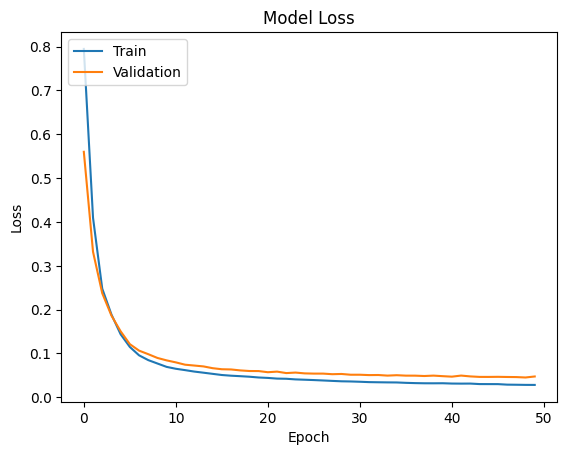

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset and rename the first column to 'Date'
df = pd.read_csv("stock_data.csv")
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Prepare the data for modeling (use all columns except 'Date')
stock_data = df.values

# Scale the data
scaler = StandardScaler()
stock_data_scaled = scaler.fit_transform(stock_data)

# Prepare sequences for RNN
sequence_length = 10  # Define the sequence length
X, y = [], []
for i in range(len(stock_data_scaled) - sequence_length):
    X.append(stock_data_scaled[i:i + sequence_length])
    y.append(stock_data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the RNN model
from tensorflow.keras.layers import SimpleRNN, Dense

model = tf.keras.Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(y_train.shape[1]))  # Output layer with same shape as input

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=50)

# Evaluate the model
model.evaluate(x_test, y_test)
model.save('rnn_stock_model.keras')

# Plot training history
def plot_curves(history):
    # Accuracy plot
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Loss plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot training history
plot_curves(history)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0706 - loss: 0.5788 - val_accuracy: 0.0697 - val_loss: 0.2861
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0699 - loss: 0.2790 - val_accuracy: 0.0712 - val_loss: 0.2685
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0689 - loss: 0.2683 - val_accuracy: 0.0717 - val_loss: 0.2652
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0700 - loss: 0.2647 - val_accuracy: 0.0712 - val_loss: 0.2632
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0707 - loss: 0.2633 - val_accuracy: 0.0693 - val_loss: 0.2613
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0700 - loss: 0.2609 - val_accuracy: 0.0729 - val_loss: 0.2586
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0724 - loss: 0.2577 - val_accuracy: 0.0768 - val_loss: 0.2526
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18m

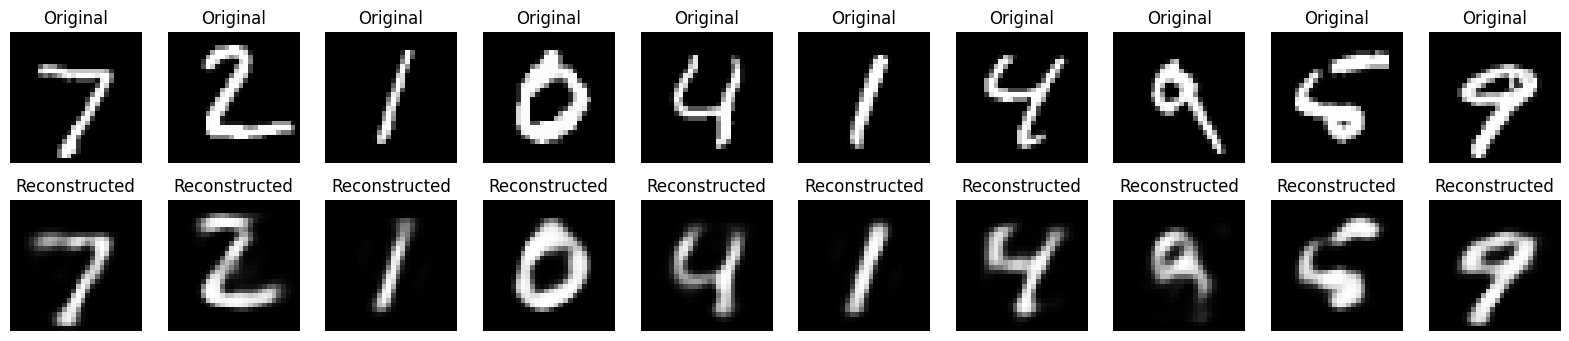

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import tensorflow as tf

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0  # Normalize the images
x_test = x_test.astype("float32") / 255.0  # Normalize the images

# Check the shapes of training and test sets
x_train.shape, x_test.shape

# Build the Autoencoder model
input_img = Input(shape=(28, 28))  # Input shape
x = tf.keras.layers.Rescaling(1./255)(input_img)  # Rescale layer
x = Flatten()(x)  # Flatten the 28x28 images to 784-dimension vectors

# Encoder
encoded = Dense(64, activation='relu')(x)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)
decoded = Reshape((28, 28))(decoded)  # Reshape back to 28x28 images

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Generate reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

# Save the model
autoencoder.save('autoencoder.keras')

GPU is not available
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5236 - loss: 0.6935 - val_accuracy: 0.5600 - val_loss: 0.6918
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6592 - loss: 0.6858 - val_accuracy: 0.6400 - val_loss: 0.6651
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.7525 - loss: 0.5976 - val_accuracy: 0.6850 - val_loss: 0.5645
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8769 - loss: 0.3772 - val_accuracy: 0.7650 - val_loss: 0.4828
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9053 - loss: 0.2465 - val_accuracy: 0.7800 - val_loss: 0.4588
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9660 - loss: 0.1266 - val_accuracy: 0.8000 - val_loss: 0.4969
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9859 - loss: 0.0668 - val_accuracy: 0.8000 - val_loss: 0.5282
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9993 - loss: 0.0257 - val_accuracy: 0.7950 - val_loss: 0

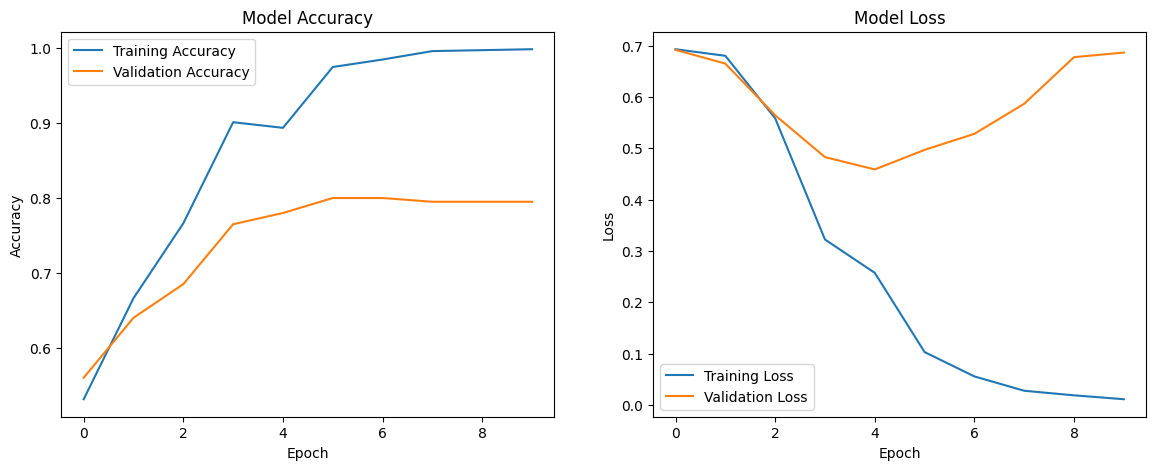

7/7 - 0s - 25ms/step - accuracy: 0.7950 - loss: 0.6866
Loss: 0.6865816712379456
Accuracy: 0.7950000166893005
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
              precision    recall  f1-score   support

    Negative       0.74      0.88      0.80        96
    Positive       0.86      0.72      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

# Check if GPU is available
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "not available")

# Load the dataset
df = pd.read_csv("/content/Restaurant_Reviews.tsv", sep="\t")

# Prepare the data
reviews = df['Review'].values
labels = df['Liked'].values

# Parameters
vocab_size = 5000
max_length = 100
embedding_dim = 16

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Define the function to plot accuracy and loss curves
def plot_curves(history):
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training history
plot_curves(history)

# Save the model
model.save("nlp_model.keras")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Classification report
predictions = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions, target_names=["Negative", "Positive"]))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the weather dataset
data = pd.read_csv('weather_data.csv')

# Print the column names to verify the correct date column name
print(data.columns)  # Should show the columns as ['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']

# Convert 'Date_Time' to datetime format
data['Date_Time'] = pd.to_datetime(data['Date_Time'])
data.set_index('Date_Time', inplace=True)

# Select relevant features for prediction (e.g., Temperature and Humidity)
features = data[['Temperature_C', 'Humidity_pct']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Prepare data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]  # Change the index according to the feature you want to predict
        X.append(a)
        y.append(data[i + time_step, 0])  # Again, change the index for the target variable
    return np.array(X), np.array(y)

# Parameters
time_step = 10  # Number of time steps
X, y = create_dataset(scaled_features, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted_weather = model.predict(X_test)

# Inverse scaling to get original values
predicted_weather = scaler.inverse_transform(predicted_weather)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, color='blue', label='Actual Temperature')
plt.plot(predicted_weather, color='red', label='Predicted Temperature')
plt.title('Weather Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Save the model
model.save('weather_lstm_model.h5')


Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25000/25000 ━━━━━━━━━━━━━━━━━━━━ 288s 11ms/step - loss: 0.0601 - val_loss: 0.0583
Epoch 2/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 317s 11ms/step - loss: 0.0584 - val_loss: 0.0583
Epoch 3/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 321s 11ms/step - loss: 0.0583 - val_loss: 0.0584
Epoch 4/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 279s 11ms/step - loss: 0.0583 - val_loss: 0.0583
Epoch 5/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 276s 11ms/step - loss: 0.0585 - val_loss: 0.0583
Epoch 6/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 323s 11ms/step - loss: 0.0584 - val_loss: 0.0583
Epoch 7/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 321s 11ms/step - loss: 0.0583 - val_loss: 0.0583
Epoch 8/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 324s 11ms/step - loss: 0.0583 - val_loss: 0.0583
Epoch 9/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 321s 11ms/step - loss: 0.0584 - val_loss: 0.0583
Epoch 10/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 319s 11ms/step - loss: 0.0583 - val_loss: 0.0583
Epoch 11/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 321s 11ms/step - loss: 0.0585 - val

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step


ValueError: non-broadcastable output operand with shape (199998,1) doesn't match the broadcast shape (199998,2)